In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv('C:\\Users\\happy\\Winter Training\\train.csv')

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

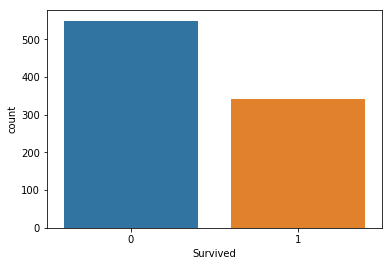

In [4]:
sb.countplot(x = 'Survived', data = df)

In [5]:
#check shape of data
df.shape

(891, 12)

In [6]:
#info. of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#1 is axis where '','','' are placed
titanic_df = df.drop(['PassengerId','Name','Ticket','Cabin'],1)
titanic_df

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  22.0      1      0    7.2500        S
1           1       1  female  38.0      1      0   71.2833        C
2           1       3  female  26.0      0      0    7.9250        S
3           1       1  female  35.0      1      0   53.1000        S
4           0       3    male  35.0      0      0    8.0500        S
5           0       3    male   NaN      0      0    8.4583        Q
6           0       1    male  54.0      0      0   51.8625        S
7           0       3    male   2.0      3      1   21.0750        S
8           1       3  female  27.0      0      2   11.1333        S
9           1       2  female  14.0      1      0   30.0708        C
10          1       3  female   4.0      1      1   16.7000        S
11          1       1  female  58.0      0      0   26.5500        S
12          0       3    male  20.0      0      0    8.0500        S
13          0       3    male  39.0      1      5   31.2750        S
14          0       3  female  14.0      0      0    7.8542        S
15          1       2  female  55.0      0      0   16.0000        S
16          0       3    male   2.0      4      1   29.1250        Q
17          1       2    male   NaN      0      0   13.0000        S
18          0       3  female  31.0      1      0   18.0000        S
19          1       3  female   NaN      0      0    7.2250        C
20          0       2    male  35.0      0      0   26.0000        S
21          1       2    male  34.0      0      0   13.0000        S
22          1       3  female  15.0      0      0    8.0292        Q
23          1       1    male  28.0      0      0   35.5000        S
24          0       3  female   8.0      3      1   21.0750        S
25          1       3  female  38.0      1      5   31.3875        S
26          0       3    male   NaN      0      0    7.2250        C
27          0       1    male  19.0      3      2  263.0000        S
28          1       3  female   NaN      0      0    7.8792        Q
29          0       3    male   NaN      0      0    7.8958        S
..        ...     ...     ...   ...    ...    ...       ...      ...
861         0       2    male  21.0      1      0   11.5000        S
862         1       1  female  48.0      0      0   25.9292        S
863         0       3  female   NaN      8      2   69.5500        S
864         0       2    male  24.0      0      0   13.0000        S
865         1       2  female  42.0      0      0   13.0000        S
866         1       2  female  27.0      1      0   13.8583        C
867         0       1    male  31.0      0      0   50.4958        S
868         0       3    male   NaN      0      0    9.5000        S
869         1       3    male   4.0      1      1   11.1333        S
870         0       3    male  26.0      0      0    7.8958        S
871         1       1  female  47.0      1      1   52.5542        S
872         0       1    male  33.0      0      0    5.0000        S
873         0       3    male  47.0      0      0    9.0000        S
874         1       2  female  28.0      1      0   24.0000        C
875         1       3  female  15.0      0      0    7.2250        C
876         0       3    male  20.0      0      0    9.8458        S
877         0       3    male  19.0      0      0    7.8958        S
878         0       3    male   NaN      0      0    7.8958        S
879         1       1  female  56.0      0      1   83.1583        C
880         1       2  female  25.0      0      1   26.0000        S
881         0       3    male  33.0      0      0    7.8958        S
882         0       3  female  22.0      0      0   10.5167        S
883         0       2    male  28.0      0      0   10.5000        S
884         0       3    male  25.0      0      0    7.0500        S
885         0       3  female  39.0      0      5   29.1250        Q
886         0       2    male  27.0      0      0   13.0000        S
887

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

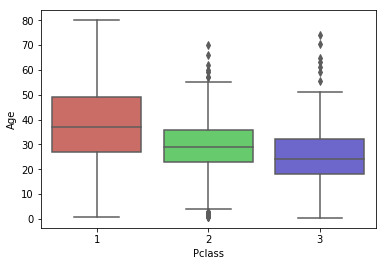

In [9]:
#there is also the hls_plaette() function that lets you  control the lightness and saturation of the colors.
sb.boxplot(x = 'Pclass', y = 'Age', data = titanic_df, palette = 'hls')
titanic_df.head()

In [10]:
plt.show()

In [11]:
#we can see the wealither passengers in the higher classes tend to be older,
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(age_approx, axis = 1)
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
#1st get dummies
#2nd drop that columns
#3rd concat with the original data

gender = pd.get_dummies(titanic_df['Sex'])
gender.head()
titanic_df.head()

titanic_df.drop(['Sex','Embarked'],axis=1,inplace=True)
titanic_df.head()

titanic_dmy = pd.concat([titanic_df,gender],axis=1)
titanic_dmy.head()

Survived  Pclass   Age  SibSp  Parch     Fare  female  male
0         0       3  22.0      1      0   7.2500       0     1
1         1       1  38.0      1      0  71.2833       1     0
2         1       3  26.0      0      0   7.9250       1     0
3         1       1  35.0      1      0  53.1000       1     0
4         0       3  35.0      0      0   8.0500       0     1

In [14]:
df_x = titanic_dmy.ix[:,(1,2,6,7)].values
df_y = titanic_dmy.ix[:,0].values

C:\Users\happy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\happy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [15]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [16]:
from sklearn.svm import SVC
svm = SVC(kernel = 'poly', degree = 2)
svm.fit(x_train,y_train)
pred = svm.predict(x_test)

C:\Users\happy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,pred)

0.8100558659217877

In [18]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(y_test, pred)
classification_report = classification_report(y_test, pred)

In [19]:
print(confusion_metric)
print(classification_report)

[[106  13]
 [ 21  39]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       119
           1       0.75      0.65      0.70        60

   micro avg       0.81      0.81      0.81       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.81      0.81      0.81       179



In [20]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 2)
clf.fit(x_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
predic = clf.predict(x_test)
predic

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,predic)

0.39664804469273746